# MSIT-IAPS FrSBe Analyses

In [1]:
#Set libraries
import pandas as pd
import numpy as np
import conda
import matplotlib.pyplot as plt
import os
import csv
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import copy

In [23]:
dir='/Users/emilyhahn/projects/frsbe/'

df=[]
df=pd.read_csv('bp_hc_frsbe_rois_betas.csv')

df=pd.DataFrame(df)
bp_df=copy.copy(df[:38])
hc_df=copy.copy(df[38:])

display(df)

,subject,bp_vs_hc,age,gender,education,frsb_aat,frsb_adt,frsb_aet,frsb_att,Ldmpfc[-34.0 40.0 26.0],Rdmpfc[34.0 40.0 26.0],Ldacc[-10.0 18.0 34.0],Rdacc[10.0 18.0 34.0],Linsula[-30_18_8],Rinsula[30.0 18.0 8.0],Lthalamus[-8.0 -16.0 8.0],Rthalamus[8.0 -16.0 8.0],Rdlpfc[42.0 28.0 26.0]
0,CBT_BP01,2,30,1,17.0,107,52,88,88,3.0104,0.0477,2.9314,0.3709,1.9516,3.8033,2.3284,3.042111,2.265465
1,CBT_BP02,2,22,0,15.0,54,71,66,66,-1.5288,-0.8388,-0.6810,-0.6865,-1.1740,-1.8295,-0.8650,-1.196364,0.212171
2,CBT_BP05,2,55,0,14.0,101,83,85,69,0.7057,-0.6659,0.1175,-1.0997,0.3354,2.3745,1.1568,-0.211733,-0.061772
3,CBT_BP06,2,31,1,16.0,53,35,38,39,1.5179,1.1084,2.6513,0.4578,3.2666,-0.1293,1.6944,2.601561,2.913657
4,CBT_BP07,2,32,1,16.0,79,76,89,89,-0.0405,1.7776,0.6654,-2.6485,1.2422,2.2242,2.4944,1.715217,-0.999268
5,CBT_BP08,2,26,0,16.0,86,67,72,78,-0.0441,-0.0308,1.4744,-0.5109,0.4297,1.7851,0.6269,0.905537,0.676818
6,CBT_BP09,2,46,1,14.0,56,58,63,61,0.6981,-0.9952,1.7478,-0.8389,1.3744,1.6993,0.6204,2.911442,1.200267
7,CBT_BP10,2,38,0,14.0,94,105,92,102,0.5616,0.6440,1.1340,0.2401,0.5863,2.2804,-0.2759,1.223279,2.179357
8,CBT_BP11,2,27,0,16.0,76,80,81,83,1.0670,2.2008,2.3325,0.4131,1.2132,-0.4969,1.1182,1.504055,0.918306
9,CBT_BP15,2,23,0,18.0,82,47,46,58,1.2497,0.7381,1.0544,-0.1574,0.7381,0.6288,0.7834,0.139892,0.896044


In [3]:
# Z-score demographics
df['age']=zscore(df['age'])
df['education']=zscore(df['education'])

# Z-score frsbe subscales and total
df['frsb_aat']=zscore(df['frsb_aat'])
df['frsb_adt']=zscore(df['frsb_adt'])
df['frsb_aet']=zscore(df['frsb_aet'])
df['frsb_att']=zscore(df['frsb_att'])

df['Ldmpfc[-34.0 40.0 26.0]']=zscore(df['Ldmpfc[-34.0 40.0 26.0]'])
df['Rdmpfc[34.0 40.0 26.0]']=zscore(df['Rdmpfc[34.0 40.0 26.0]'])
df['Ldacc[-10.0 18.0 34.0]']=zscore(df['Ldacc[-10.0 18.0 34.0]'])
df['Rdacc[10.0 18.0 34.0]']=zscore(df['Rdacc[10.0 18.0 34.0]'])
df['Linsula[-30_18_8]']=zscore(df['Linsula[-30_18_8]'])
df['Rinsula[30.0 18.0 8.0]']=zscore(df['Rinsula[30.0 18.0 8.0]'])
df['Lthalamus[-8.0 -16.0 8.0]']=zscore(df['Lthalamus[-8.0 -16.0 8.0]'])
df['Rthalamus[8.0 -16.0 8.0]']=zscore(df['Rthalamus[8.0 -16.0 8.0]'])
df['Rdlpfc[42.0 28.0 26.0]']=zscore(df['Rdlpfc[42.0 28.0 26.0]'])

In [28]:
### Calculate demographic variables

def demographics(subs):

    mean_age=np.mean(subs['age'])
    sd_age=np.std(subs['age'])
    gender_count=subs['gender'].value_counts()

    print('mean age: %d \nstandard deviation: %d \nfemale: %d male: %d' \
          % (mean_age,sd_age,gender_count[0],gender_count[1]))
    
    return

print('BP and HC: ')
demographics(df)

print('\nBP: ')
demographics(bp_df)

print('\nHC: ')
demographics(hc_df)

BP and HC: 
mean age: 35 
standard deviation: 12 
female: 40 male: 34

BP: 
mean age: 36 
standard deviation: 12 
female: 22 male: 16

HC: 
mean age: 34 
standard deviation: 12 
female: 18 male: 18


### Linear Regressions: ROIS and FrSBe scores (Apathy, Disinhibition, Executive Functioning)

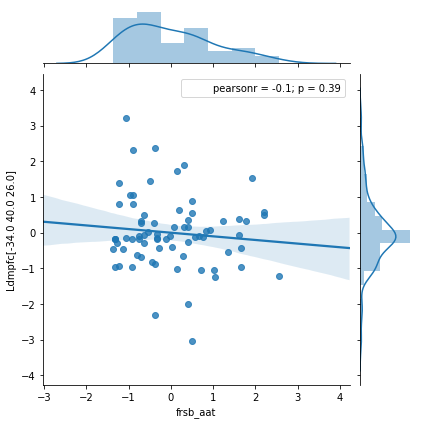

Slope: -0.10 
Intercept: 0.00 
Standard Error: 0.12


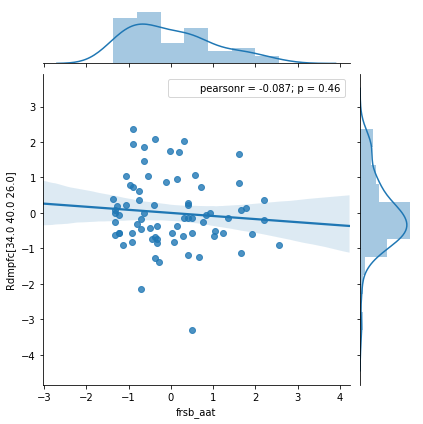

Slope: -0.09 
Intercept: 0.00 
Standard Error: 0.12


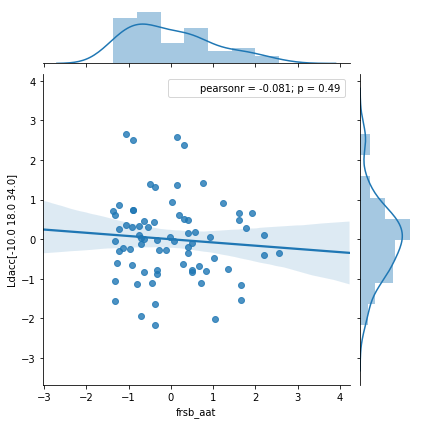

Slope: -0.08 
Intercept: 0.00 
Standard Error: 0.12


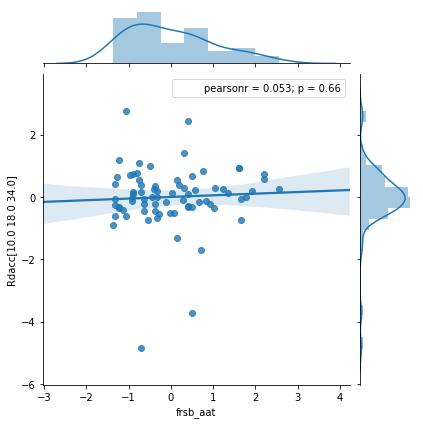

Slope: 0.05 
Intercept: 0.00 
Standard Error: 0.12


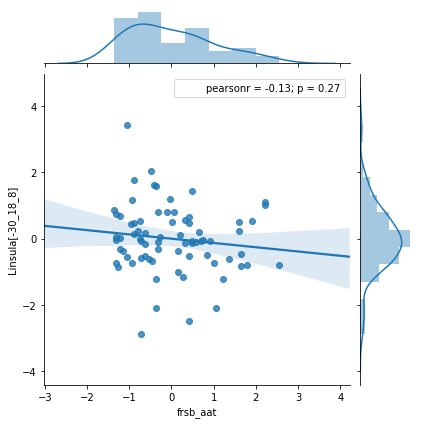

Slope: -0.13 
Intercept: 0.00 
Standard Error: 0.12


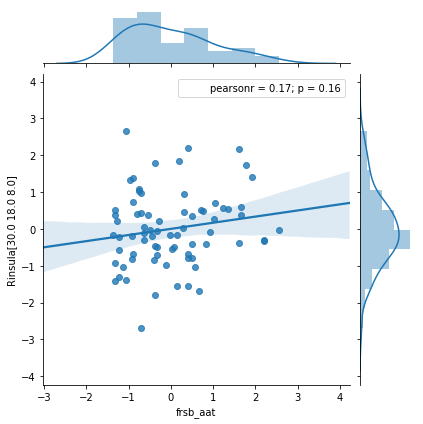

Slope: 0.17 
Intercept: -0.00 
Standard Error: 0.12


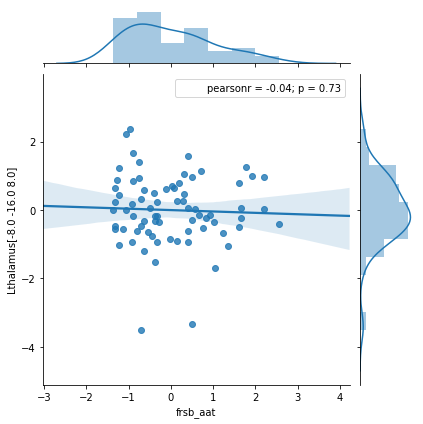

Slope: -0.04 
Intercept: 0.00 
Standard Error: 0.12


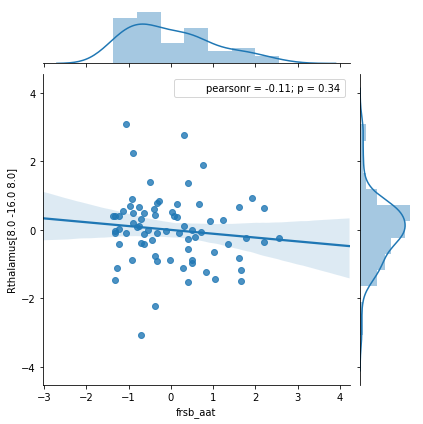

Slope: -0.11 
Intercept: 0.00 
Standard Error: 0.12


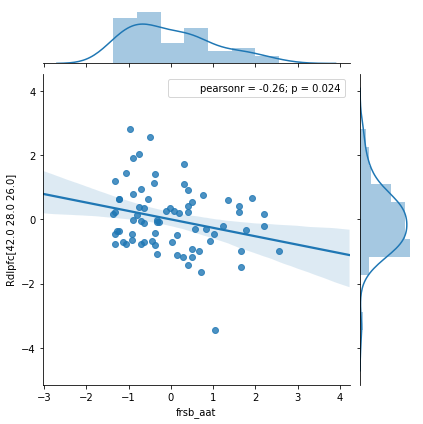

Slope: -0.26 
Intercept: -0.00 
Standard Error: 0.11


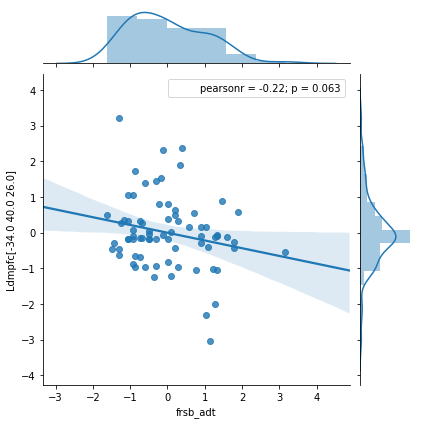

Slope: -0.22 
Intercept: 0.00 
Standard Error: 0.12


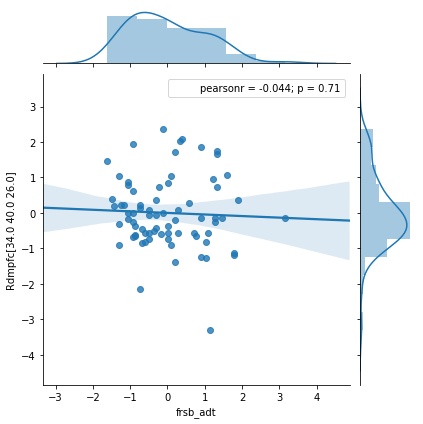

Slope: -0.04 
Intercept: 0.00 
Standard Error: 0.12


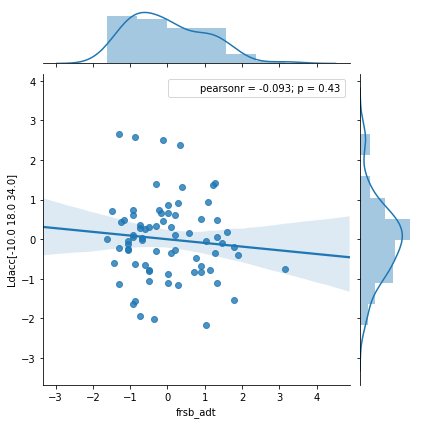

Slope: -0.09 
Intercept: 0.00 
Standard Error: 0.12


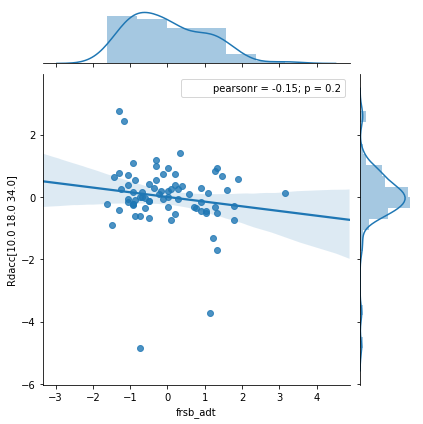

Slope: -0.15 
Intercept: 0.00 
Standard Error: 0.12


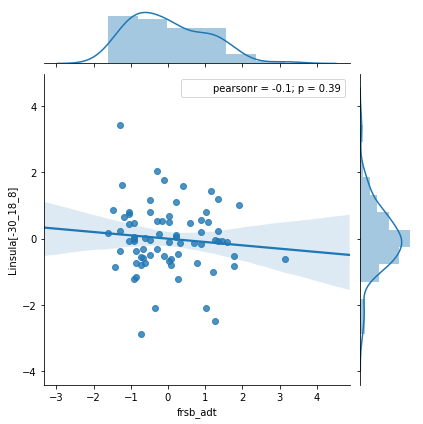

Slope: -0.10 
Intercept: 0.00 
Standard Error: 0.12


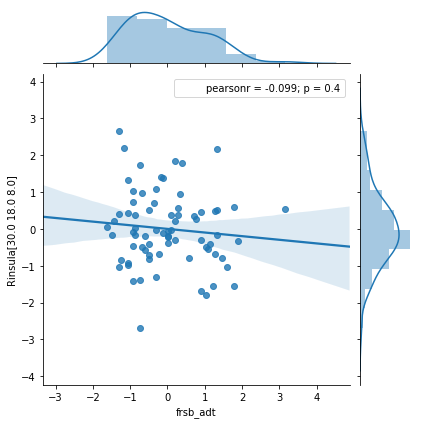

Slope: -0.10 
Intercept: -0.00 
Standard Error: 0.12


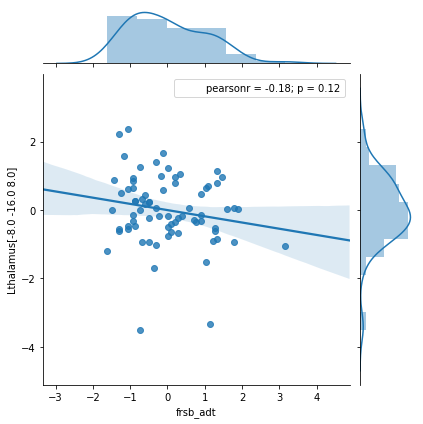

Slope: -0.18 
Intercept: 0.00 
Standard Error: 0.12


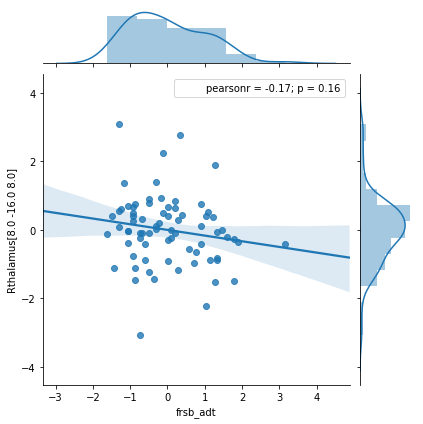

Slope: -0.17 
Intercept: 0.00 
Standard Error: 0.12


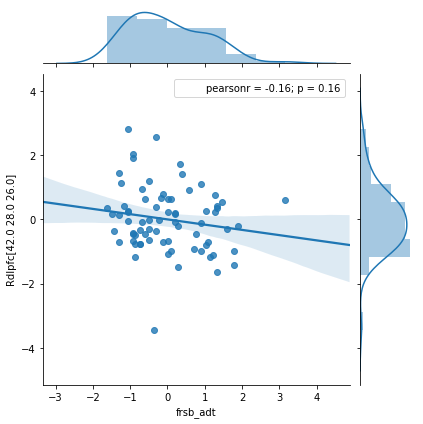

Slope: -0.16 
Intercept: -0.00 
Standard Error: 0.12


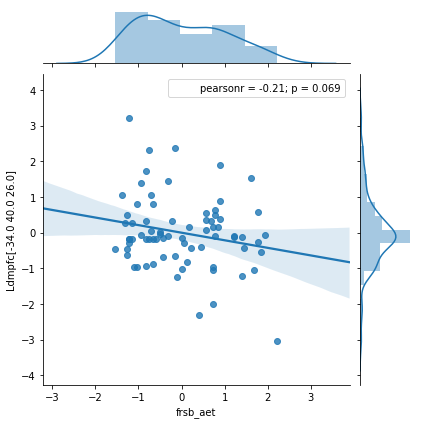

Slope: -0.21 
Intercept: 0.00 
Standard Error: 0.12


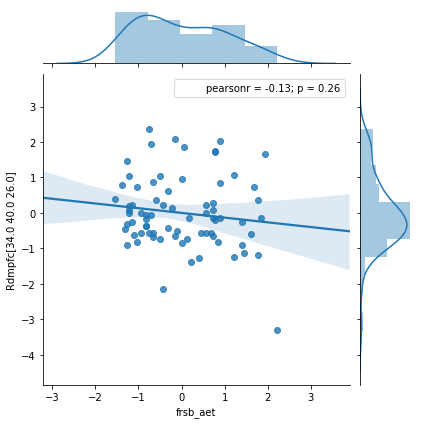

Slope: -0.13 
Intercept: 0.00 
Standard Error: 0.12


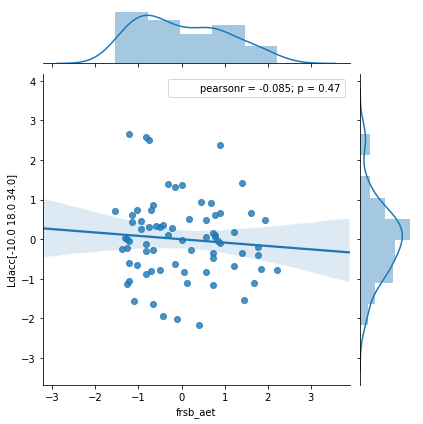

Slope: -0.09 
Intercept: 0.00 
Standard Error: 0.12


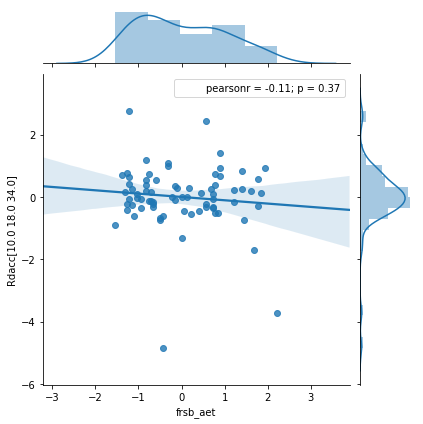

Slope: -0.11 
Intercept: -0.00 
Standard Error: 0.12


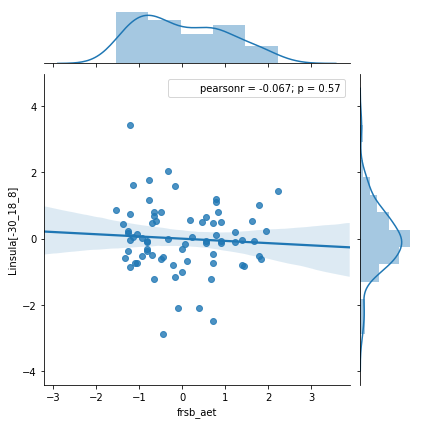

Slope: -0.07 
Intercept: 0.00 
Standard Error: 0.12


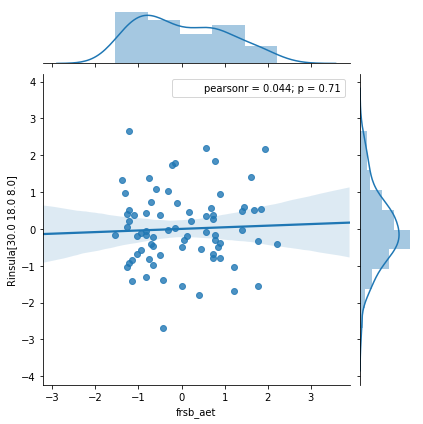

Slope: 0.04 
Intercept: -0.00 
Standard Error: 0.12


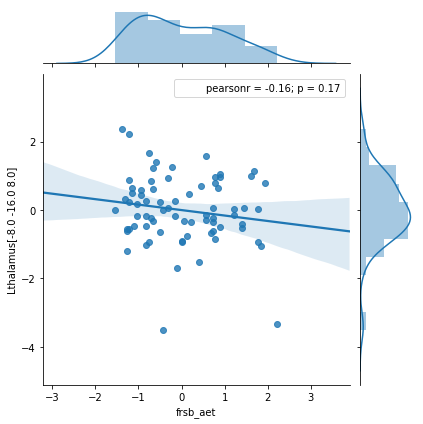

Slope: -0.16 
Intercept: 0.00 
Standard Error: 0.12


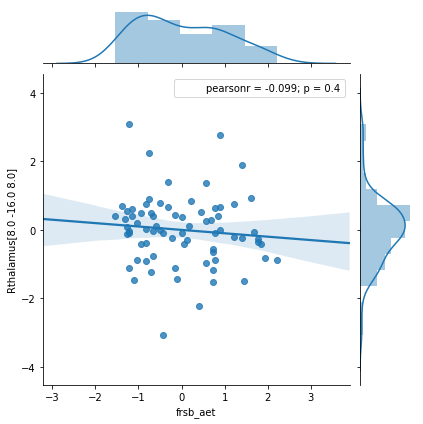

Slope: -0.10 
Intercept: 0.00 
Standard Error: 0.12


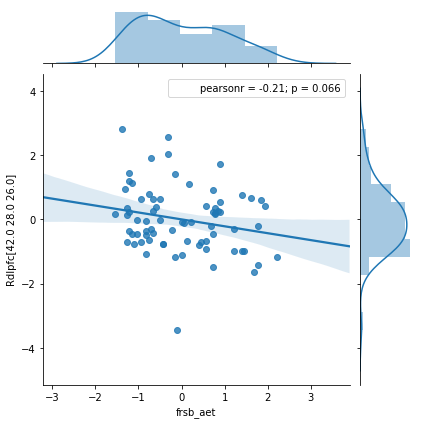

Slope: -0.21 
Intercept: -0.00 
Standard Error: 0.12


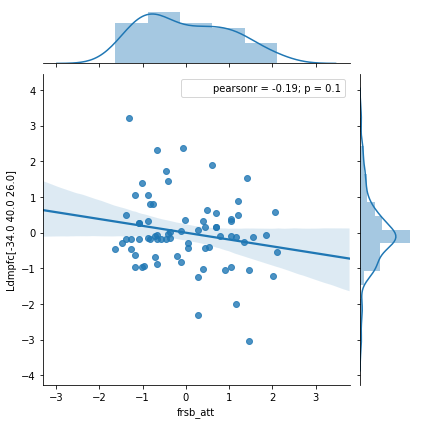

Slope: -0.19 
Intercept: 0.00 
Standard Error: 0.12


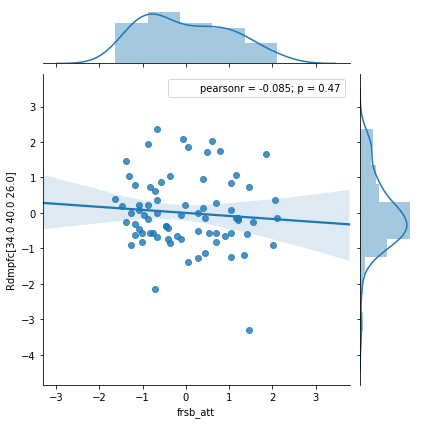

Slope: -0.09 
Intercept: 0.00 
Standard Error: 0.12


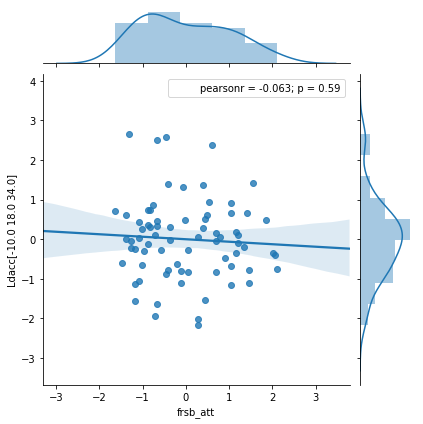

Slope: -0.06 
Intercept: 0.00 
Standard Error: 0.12


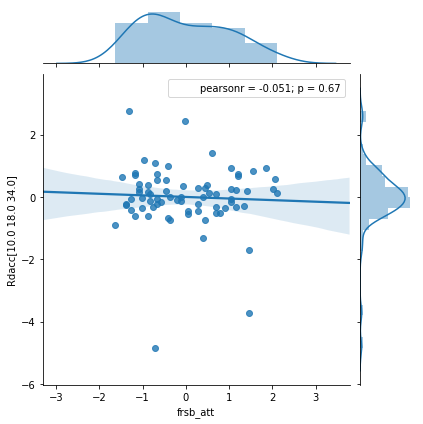

Slope: -0.05 
Intercept: 0.00 
Standard Error: 0.12


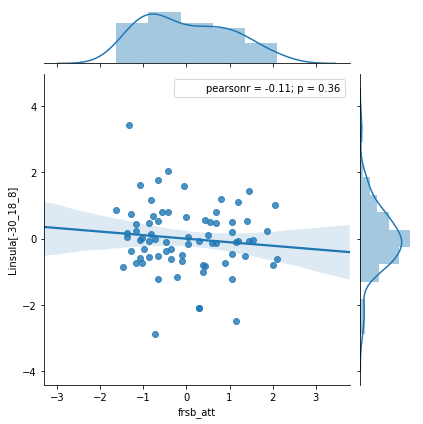

Slope: -0.11 
Intercept: 0.00 
Standard Error: 0.12


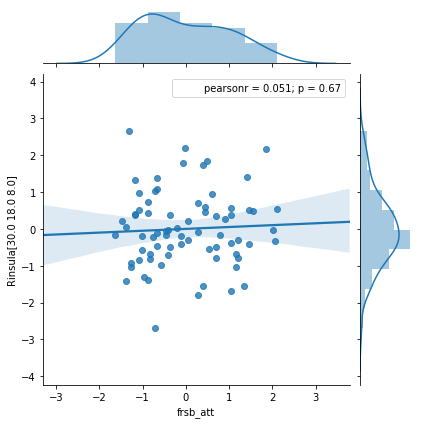

Slope: 0.05 
Intercept: -0.00 
Standard Error: 0.12


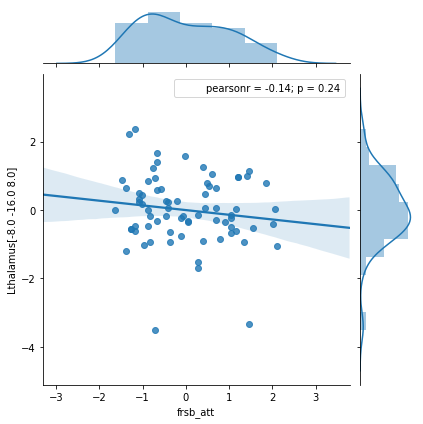

Slope: -0.14 
Intercept: 0.00 
Standard Error: 0.12


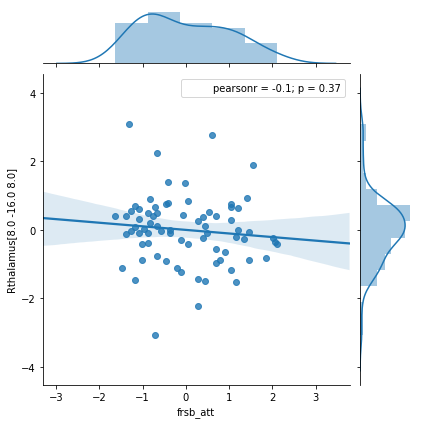

Slope: -0.10 
Intercept: 0.00 
Standard Error: 0.12


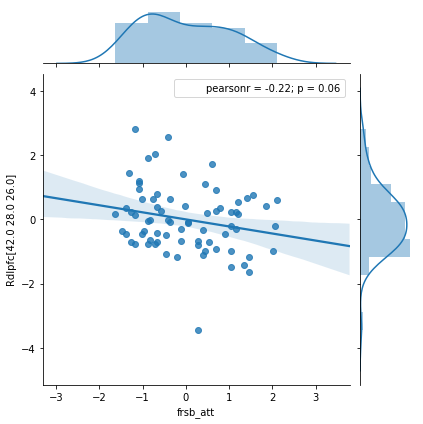

Slope: -0.22 
Intercept: 0.00 
Standard Error: 0.11


In [5]:
###----------###

%matplotlib inline

frsbe=[df['frsb_aat'],df['frsb_adt'],df['frsb_aet'],df['frsb_att']]
rois=[df['Ldmpfc[-34.0 40.0 26.0]'], df['Rdmpfc[34.0 40.0 26.0]'], \
      df['Ldacc[-10.0 18.0 34.0]'],df['Rdacc[10.0 18.0 34.0]'], \
      df['Linsula[-30_18_8]'],df['Rinsula[30.0 18.0 8.0]'], \
      df['Lthalamus[-8.0 -16.0 8.0]'],df['Rthalamus[8.0 -16.0 8.0]'], \
      df['Rdlpfc[42.0 28.0 26.0]']]
      
x1=[]
y1=[]

def plots(x1,y1):
    for subscale in frsbe:
        x1=subscale
        for roi in rois:
            y1=roi
            sns.jointplot(x1, y1, data=df, kind="reg")
            plt.show()

            slope, intercept, r_value, p_value, std_err = \
                stats.linregress(x1,y1)

            print('Slope: %.2f \nIntercept: %.2f \nStandard Error: %.2f' \
                  % (slope, intercept, std_err))
    return

plots(x1,y1)

## Rdlpf, aat, aet, att

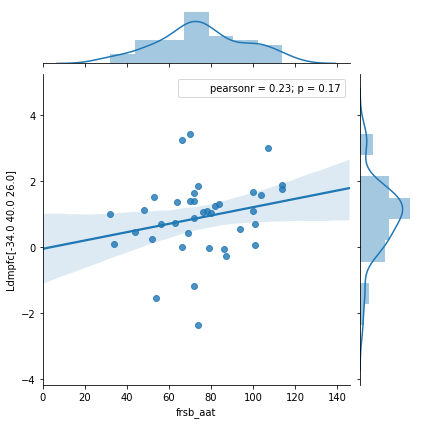

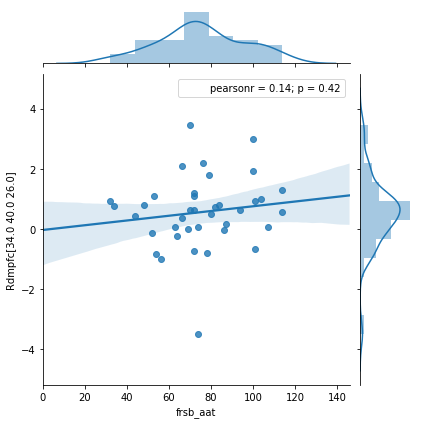

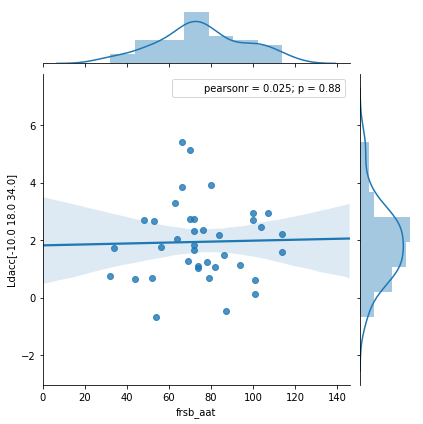

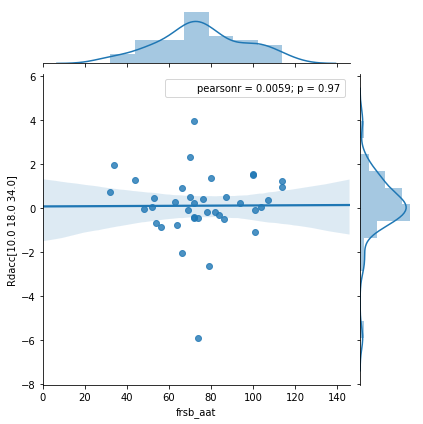

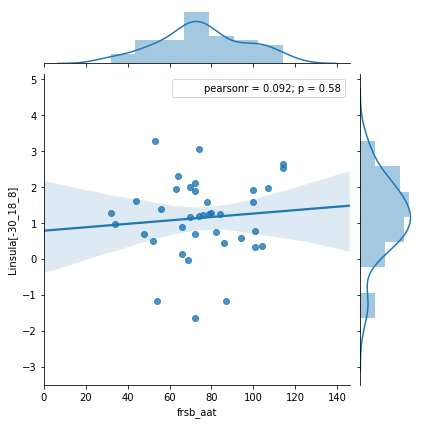

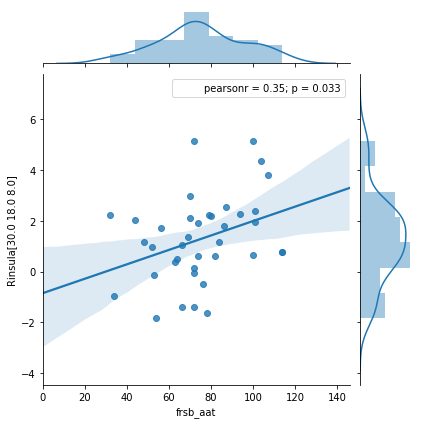

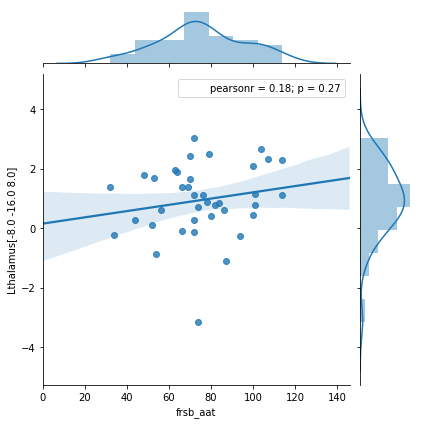

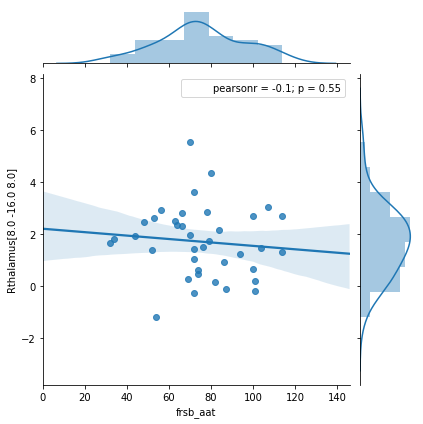

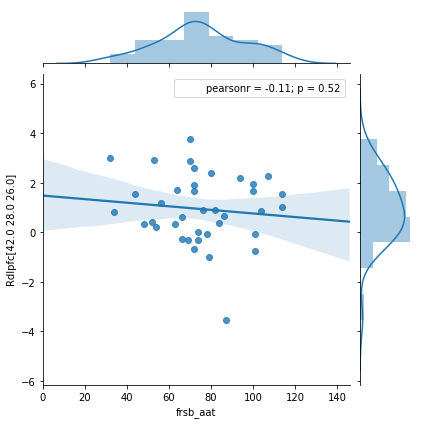

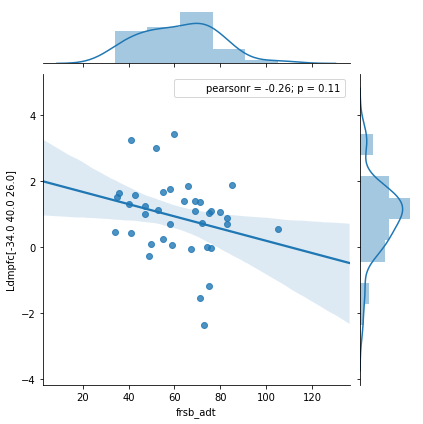

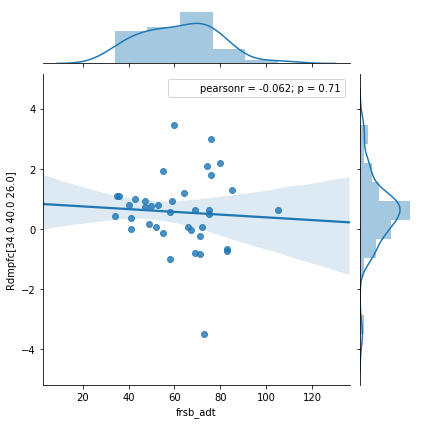

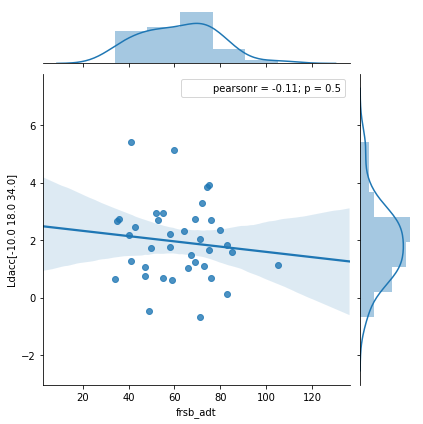

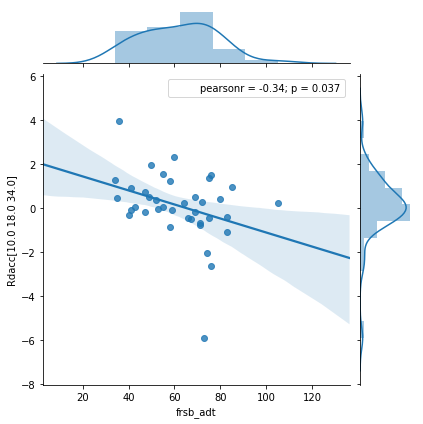

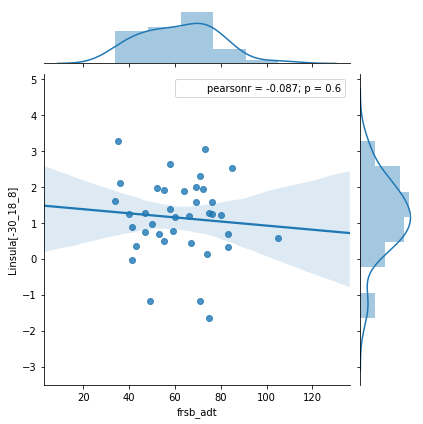

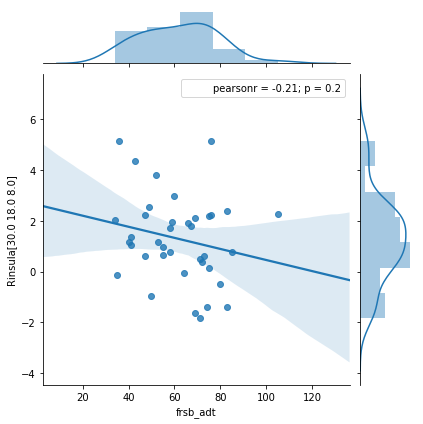

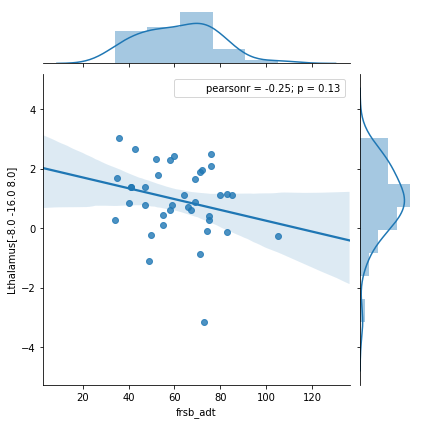

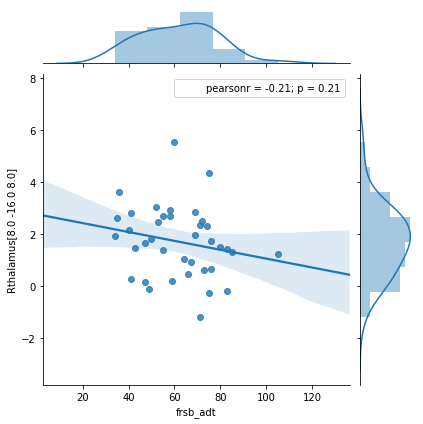

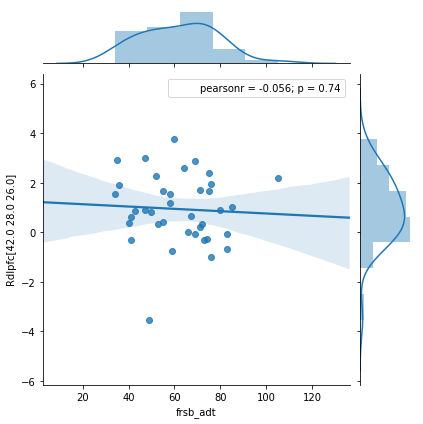

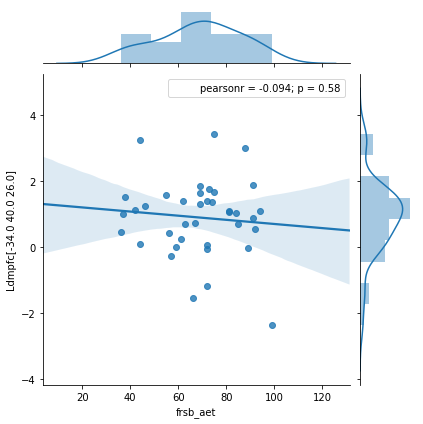

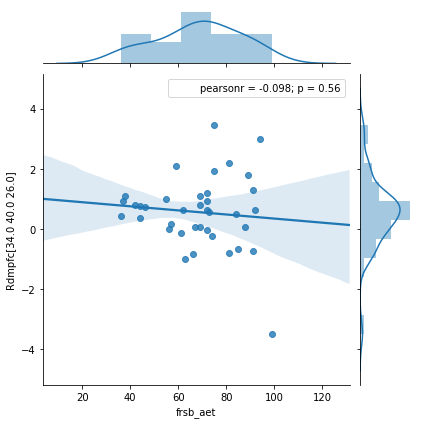

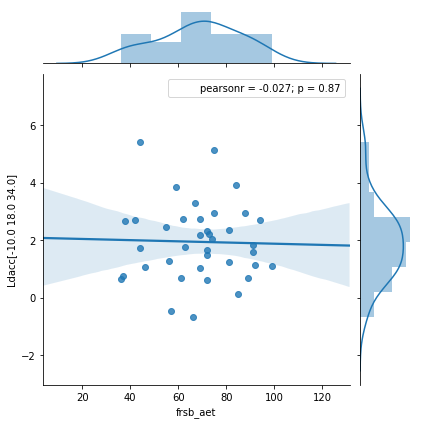

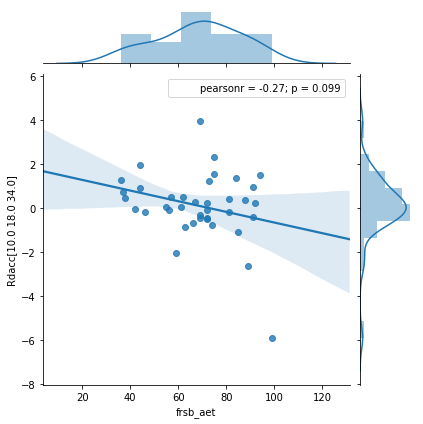

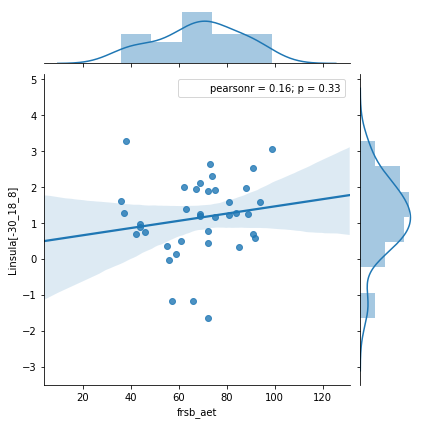

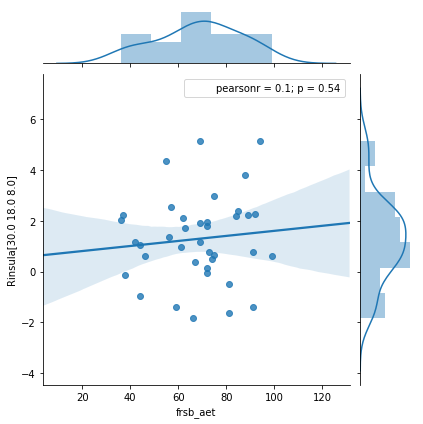

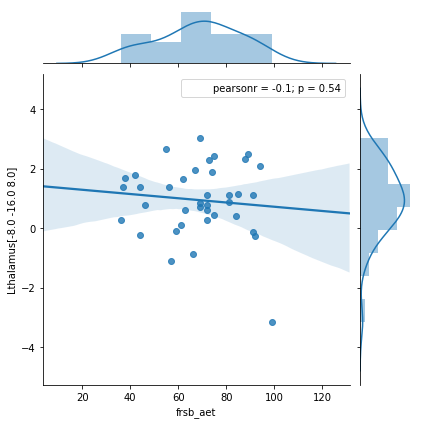

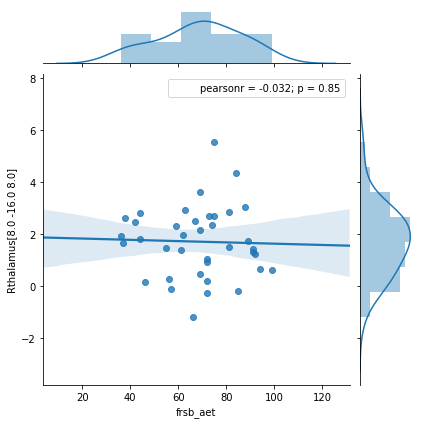

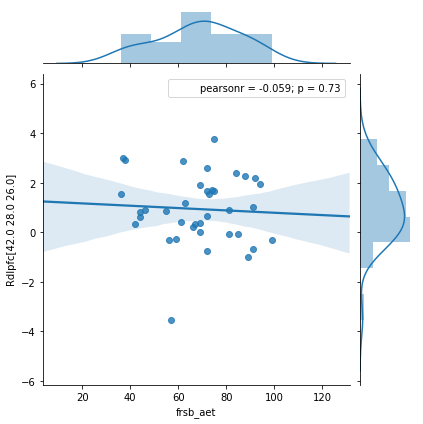

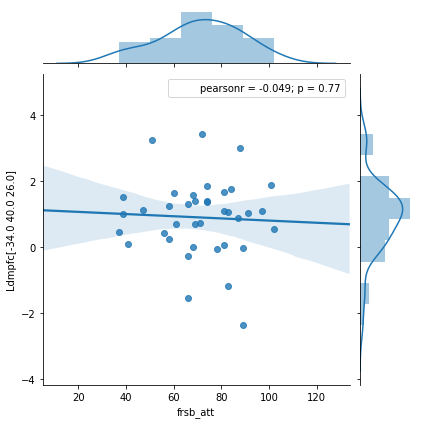

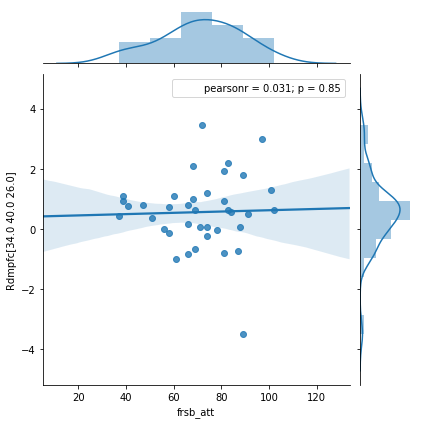

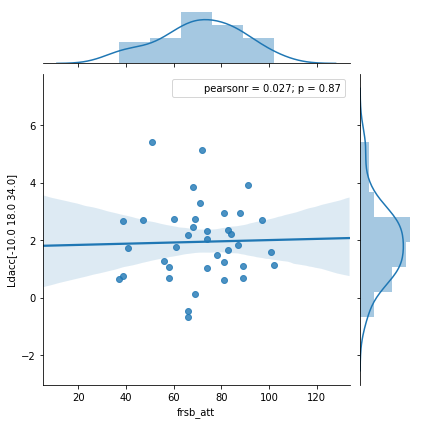

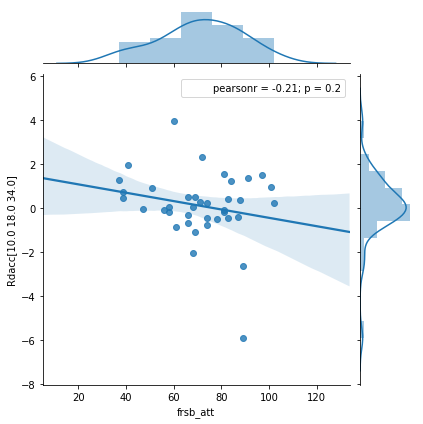

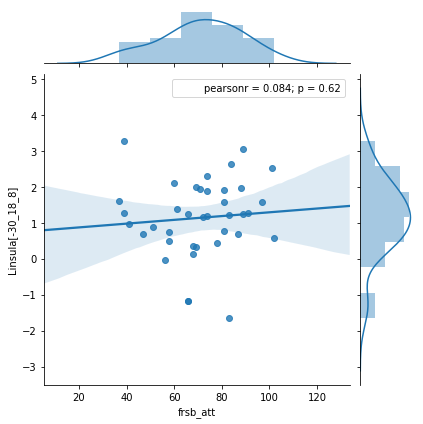

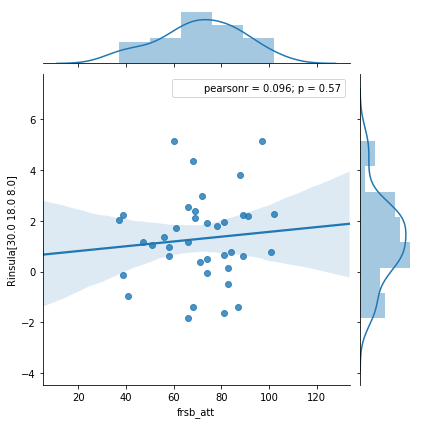

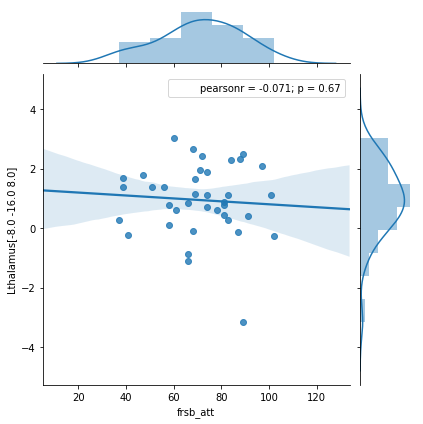

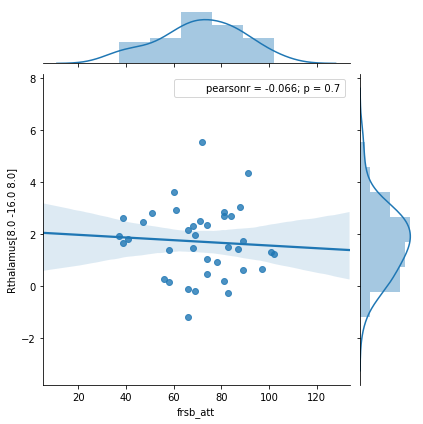

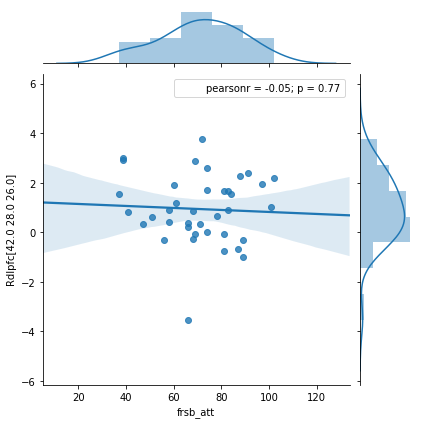

In [6]:
###----------###

%matplotlib inline

# display(bp_df)

frsbe=[bp_df['frsb_aat'],bp_df['frsb_adt'],bp_df['frsb_aet'],bp_df['frsb_att']]
rois=[bp_df['Ldmpfc[-34.0 40.0 26.0]'], bp_df['Rdmpfc[34.0 40.0 26.0]'], \
      bp_df['Ldacc[-10.0 18.0 34.0]'],bp_df['Rdacc[10.0 18.0 34.0]'], \
      bp_df['Linsula[-30_18_8]'],bp_df['Rinsula[30.0 18.0 8.0]'], \
      bp_df['Lthalamus[-8.0 -16.0 8.0]'],bp_df['Rthalamus[8.0 -16.0 8.0]'], \
      bp_df['Rdlpfc[42.0 28.0 26.0]']]
      
x1=[]
y1=[]

def plots(x1,y1):
    for subscale in frsbe:
        x1=subscale
        for roi in rois:
            y1=roi
            sns.jointplot(x1, y1, data=bp_df, kind="reg")
#             sns.regplot(x1,y1,data=bp_df)
            plt.show()

#             slope, intercept, r_value, p_value, std_err = \
#                 stats.linregress(x1,y1)

#             print('Slope: %.2f \nIntercept: %.2f \nStandard Error: %.2f' \
#                   % (slope, intercept, std_err))
    return

plots(x1,y1)

## Hits:
## R dACC, adt - neg
## R Insula, aat - pos


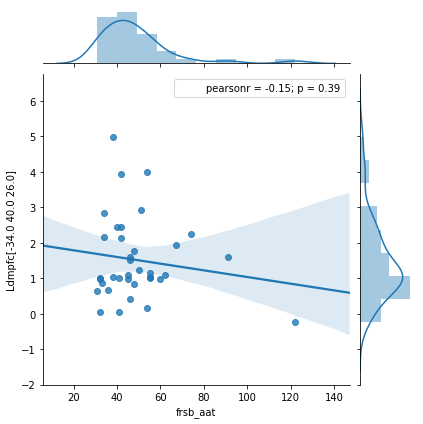

Slope: -0.01 
Intercept: 1.97 
Standard Error: 0.01


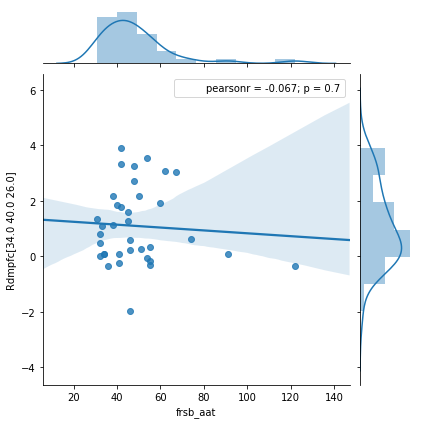

Slope: -0.01 
Intercept: 1.35 
Standard Error: 0.01


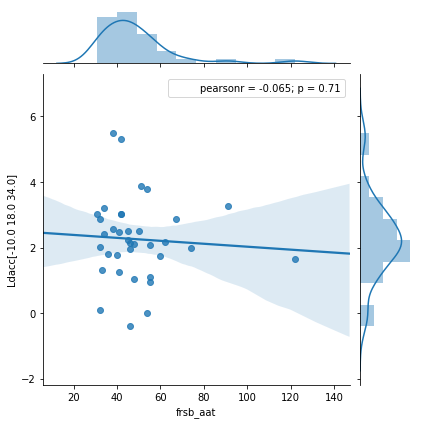

Slope: -0.00 
Intercept: 2.47 
Standard Error: 0.01


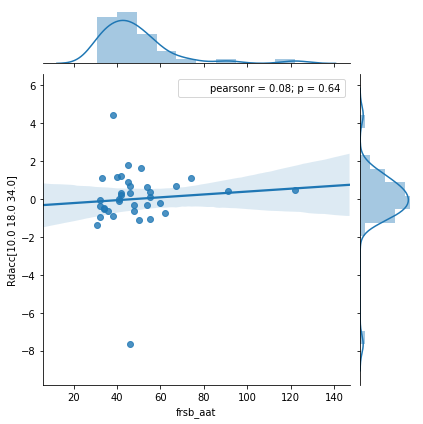

Slope: 0.01 
Intercept: -0.37 
Standard Error: 0.02


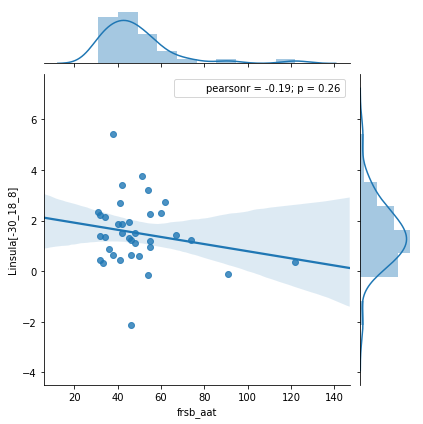

Slope: -0.01 
Intercept: 2.20 
Standard Error: 0.01


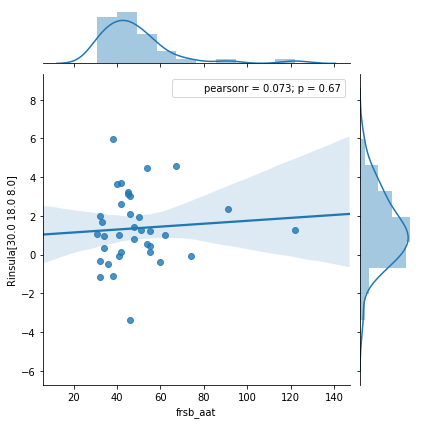

Slope: 0.01 
Intercept: 0.99 
Standard Error: 0.02


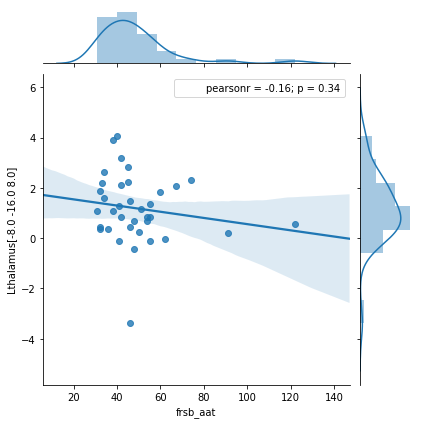

Slope: -0.01 
Intercept: 1.79 
Standard Error: 0.01


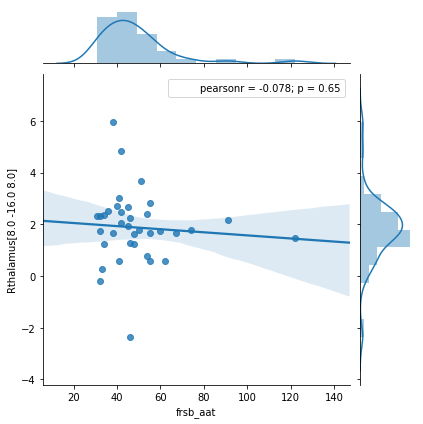

Slope: -0.01 
Intercept: 2.17 
Standard Error: 0.01


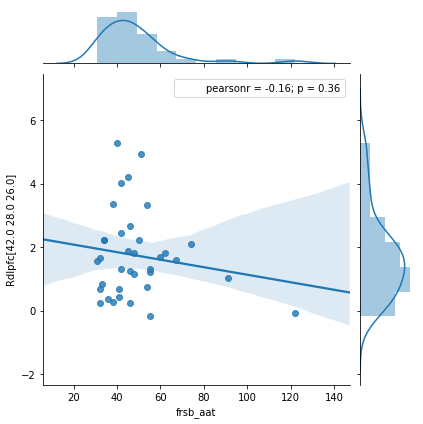

Slope: -0.01 
Intercept: 2.32 
Standard Error: 0.01


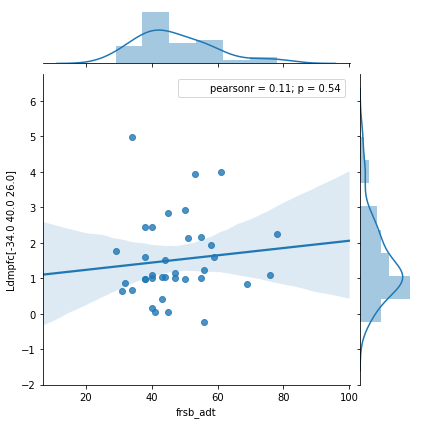

Slope: 0.01 
Intercept: 1.03 
Standard Error: 0.02


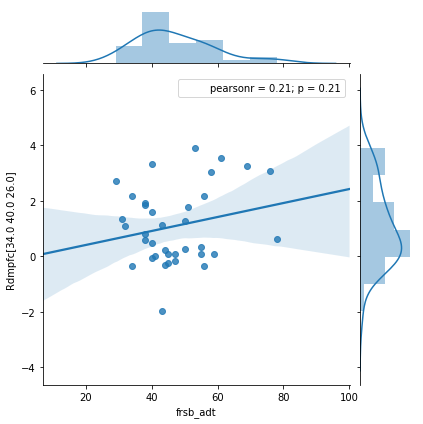

Slope: 0.03 
Intercept: -0.09 
Standard Error: 0.02


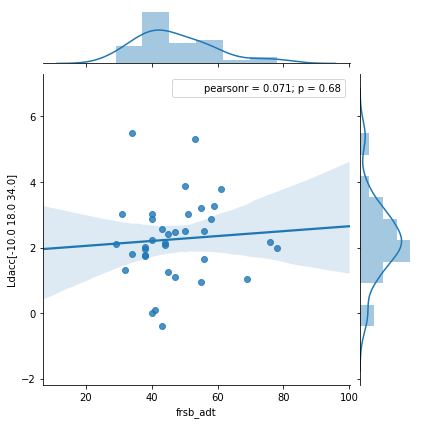

Slope: 0.01 
Intercept: 1.90 
Standard Error: 0.02


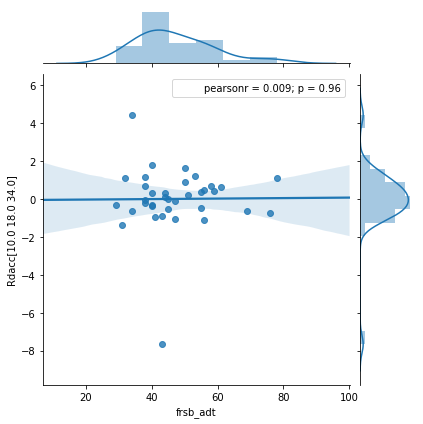

Slope: 0.00 
Intercept: -0.06 
Standard Error: 0.02


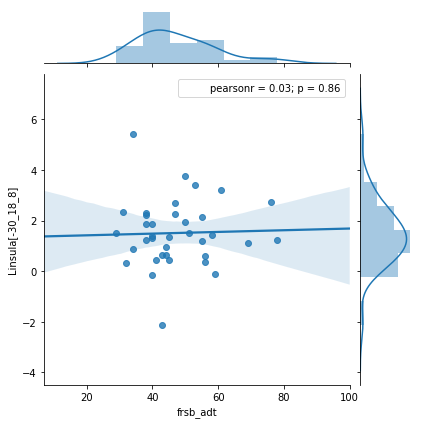

Slope: 0.00 
Intercept: 1.35 
Standard Error: 0.02


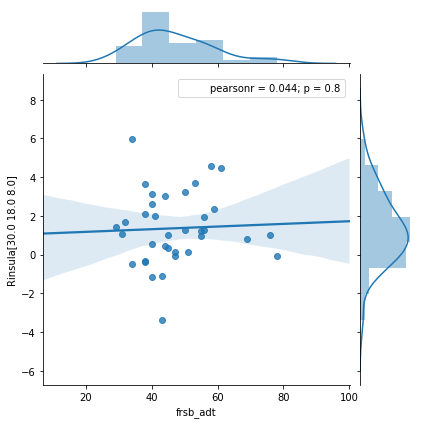

Slope: 0.01 
Intercept: 1.04 
Standard Error: 0.03


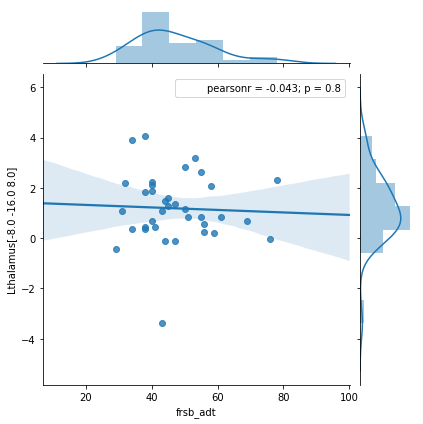

Slope: -0.00 
Intercept: 1.42 
Standard Error: 0.02


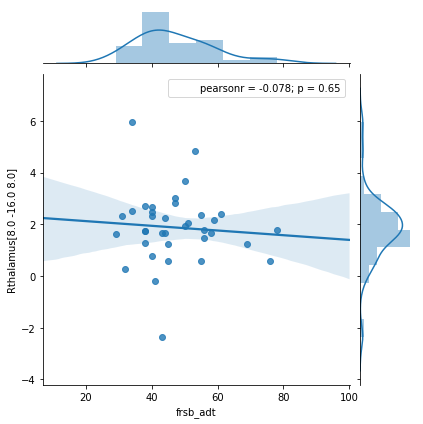

Slope: -0.01 
Intercept: 2.31 
Standard Error: 0.02


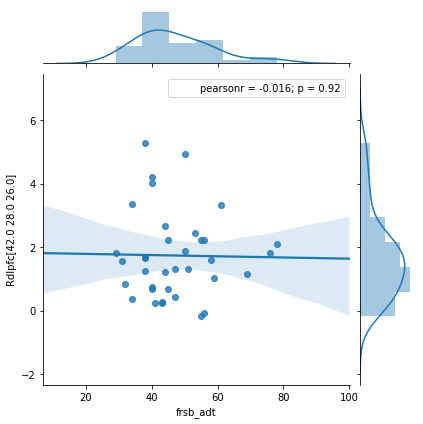

Slope: -0.00 
Intercept: 1.83 
Standard Error: 0.02


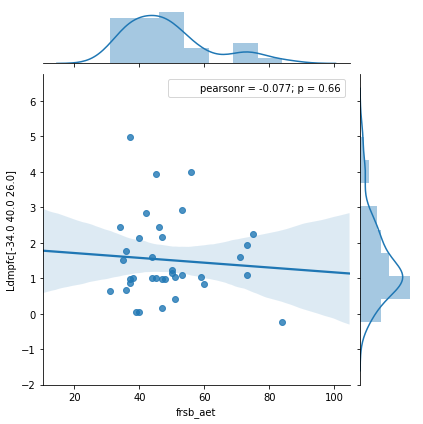

Slope: -0.01 
Intercept: 1.85 
Standard Error: 0.02


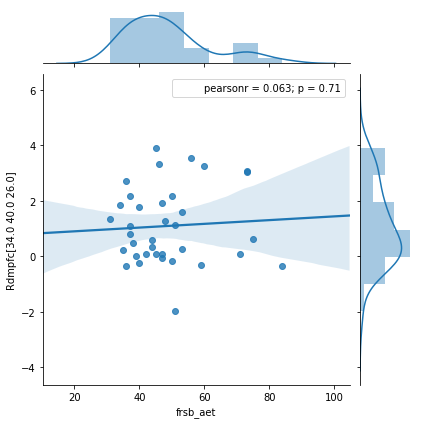

Slope: 0.01 
Intercept: 0.77 
Standard Error: 0.02


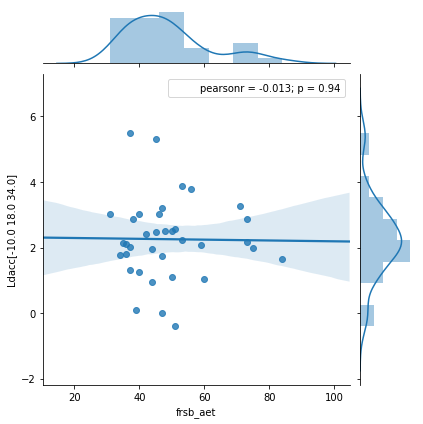

Slope: -0.00 
Intercept: 2.32 
Standard Error: 0.02


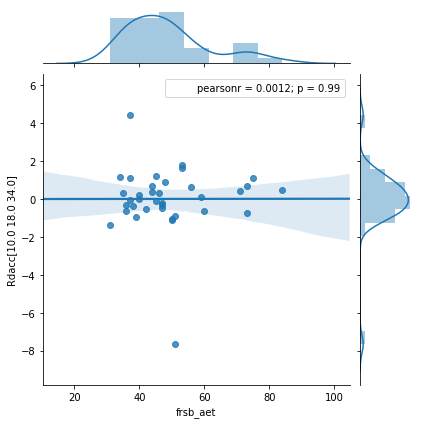

Slope: 0.00 
Intercept: -0.00 
Standard Error: 0.02


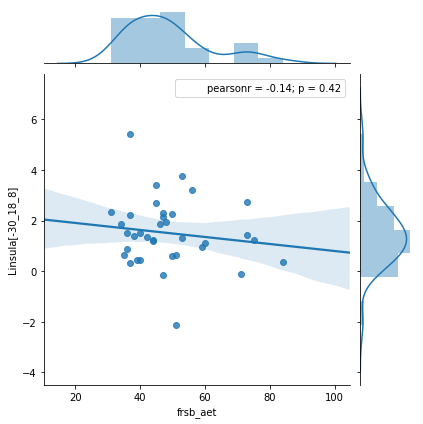

Slope: -0.01 
Intercept: 2.18 
Standard Error: 0.02


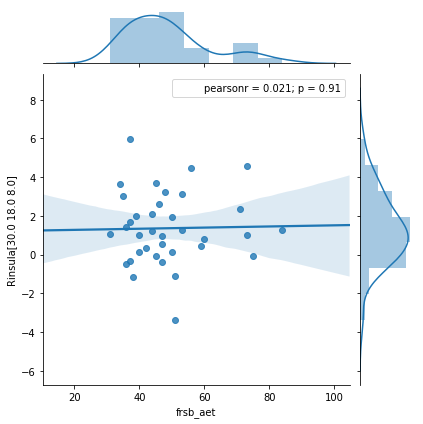

Slope: 0.00 
Intercept: 1.22 
Standard Error: 0.02


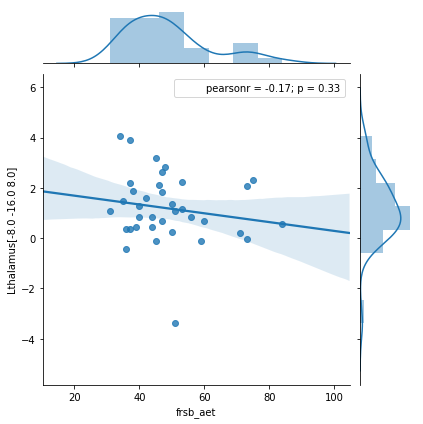

Slope: -0.02 
Intercept: 2.04 
Standard Error: 0.02


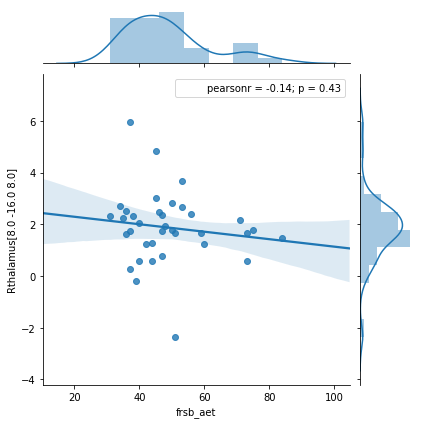

Slope: -0.01 
Intercept: 2.58 
Standard Error: 0.02


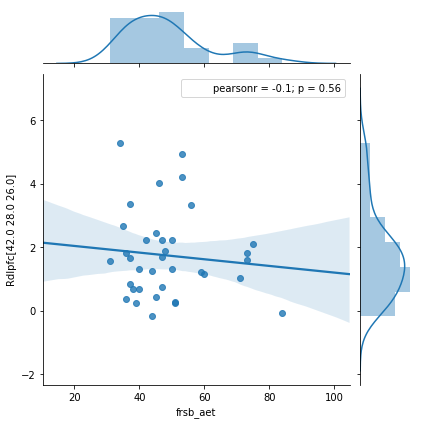

Slope: -0.01 
Intercept: 2.25 
Standard Error: 0.02


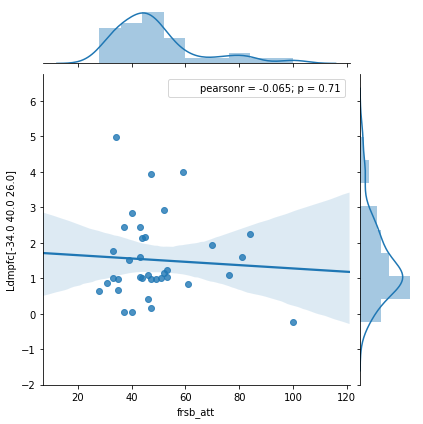

Slope: -0.00 
Intercept: 1.74 
Standard Error: 0.01


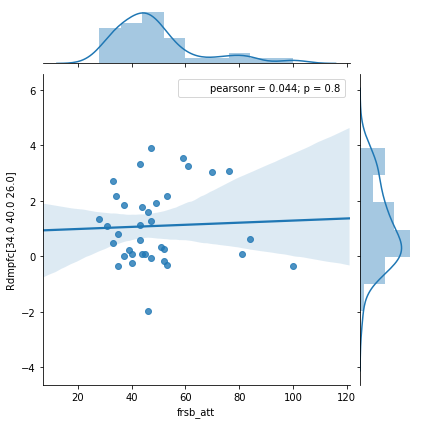

Slope: 0.00 
Intercept: 0.91 
Standard Error: 0.01


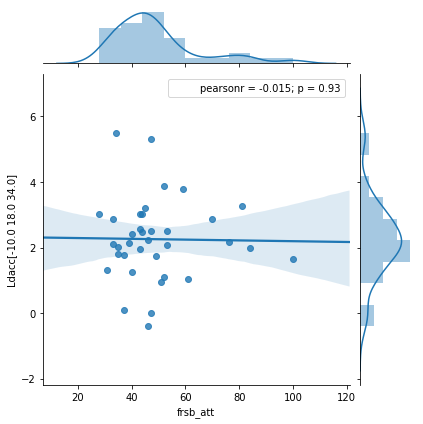

Slope: -0.00 
Intercept: 2.31 
Standard Error: 0.01


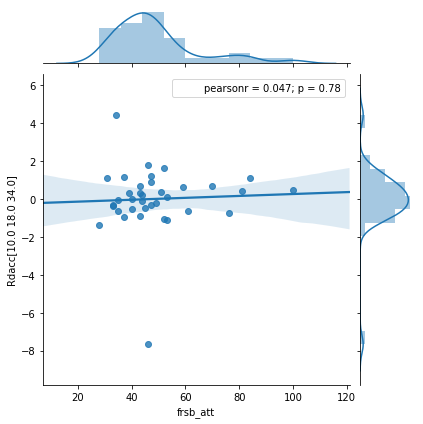

Slope: 0.01 
Intercept: -0.24 
Standard Error: 0.02


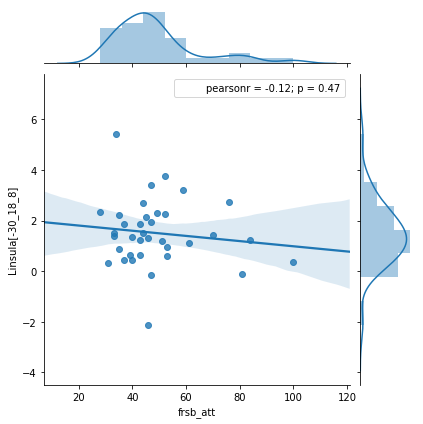

Slope: -0.01 
Intercept: 2.01 
Standard Error: 0.01


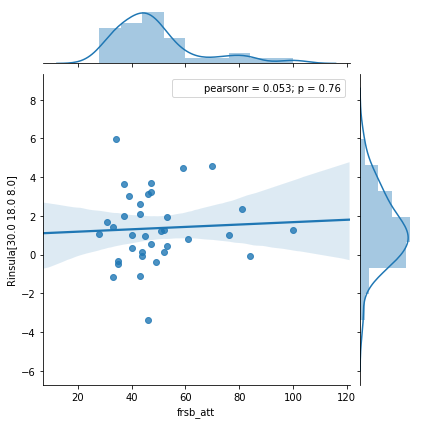

Slope: 0.01 
Intercept: 1.06 
Standard Error: 0.02


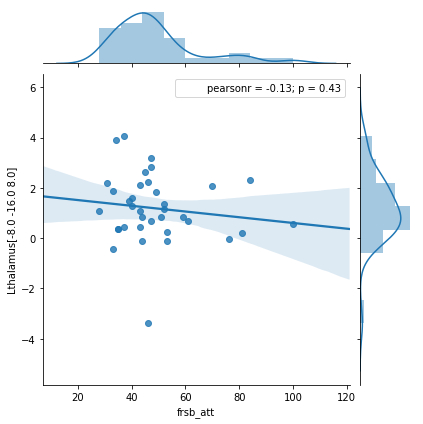

Slope: -0.01 
Intercept: 1.74 
Standard Error: 0.01


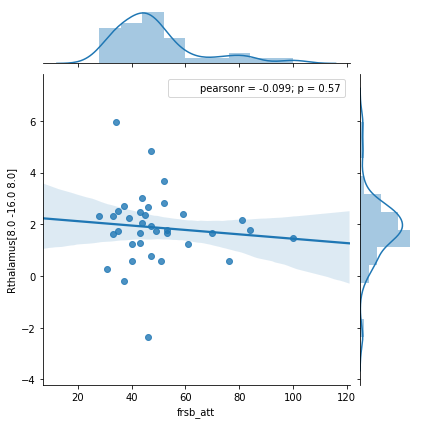

Slope: -0.01 
Intercept: 2.29 
Standard Error: 0.01


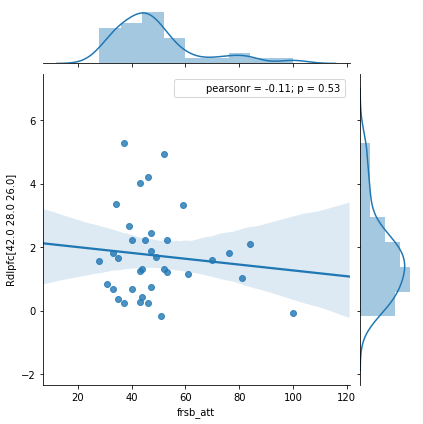

Slope: -0.01 
Intercept: 2.19 
Standard Error: 0.01


In [7]:
###----------###

%matplotlib inline

frsbe=[hc_df['frsb_aat'],hc_df['frsb_adt'],hc_df['frsb_aet'],hc_df['frsb_att']]
rois=[hc_df['Ldmpfc[-34.0 40.0 26.0]'], hc_df['Rdmpfc[34.0 40.0 26.0]'], \
      hc_df['Ldacc[-10.0 18.0 34.0]'],hc_df['Rdacc[10.0 18.0 34.0]'], \
      hc_df['Linsula[-30_18_8]'],hc_df['Rinsula[30.0 18.0 8.0]'], \
      hc_df['Lthalamus[-8.0 -16.0 8.0]'],hc_df['Rthalamus[8.0 -16.0 8.0]'], \
      hc_df['Rdlpfc[42.0 28.0 26.0]']]
      
x1=[]
y1=[]

def plots(x1,y1):
    for subscale in frsbe:
        x1=subscale
        for roi in rois:
            y1=roi
            sns.jointplot(x1, y1, data=hc_df, kind="reg")
            plt.show()

            slope, intercept, r_value, p_value, std_err = \
                stats.linregress(x1,y1)

            print('Slope: %.2f \nIntercept: %.2f \nStandard Error: %.2f' \
                  % (slope, intercept, std_err))
    return

plots(x1,y1)

### 